In [1]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv("data/reddit_worldnews_start_to_2016-11-22.csv")

In [3]:
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [4]:
# Display all columns name
df.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'subreddit'],
      dtype='object')

In [5]:
df.tail()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews
509235,1479817346,2016-11-22,1,0,Palestinian wielding knife shot dead in West B...,False,superislam,worldnews


In [6]:
df = df[df.up_votes > 100]
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews
...,...,...,...,...,...,...,...,...
509107,1479784292,2016-11-22,259,0,India All Set to Launch a $2 Billion Renewable...,False,tewrld,worldnews
509108,1479784317,2016-11-22,407,0,Jean-Claude Juncker mounts fresh call for Euro...,False,Alexandra-perez,worldnews
509118,1479789187,2016-11-22,105,0,Lockheed Martin Lands Massive $1.2 Billion Con...,False,bob21doh,worldnews
509142,1479797823,2016-11-22,536,0,Turkey s PM withdraws bill that would pardon m...,False,Jurryaany,worldnews


## Pre-processing
- Remove Stop Words
- Removal of punctuations
- Removal of links and URLs

In [7]:
# First to remove stopwords and stemming
stemmer = SnowballStemmer("english")
df["cleaned_title"] = df["title"].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in sentence.split() if word not in set(stopwords.words("english"))]))

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df[["title", "cleaned_title"]]

,title,cleaned_title
144,BBC cover Anonymous Scientology Protests!,bbc cover anonym scientolog protests!
387,Morbidly Obese Man Confused Why Fire Officials...,morbid obes man confus whi fire offici are ups...
392,*sigh* Time to update this again [pic],*sigh* time updat [pic]
652,Israeli minister vows Palestinian holocaust,isra minist vow palestinian holocaust
769,The Gaza Bombshell: Vanity Fair reports on h...,the gaza bombshell: vaniti fair report bush tr...
...,...,...
509107,India All Set to Launch a $2 Billion Renewable...,india all set launch $2 billion renew energi e...
509108,Jean-Claude Juncker mounts fresh call for Euro...,jean-claud juncker mount fresh call european a...
509118,Lockheed Martin Lands Massive $1.2 Billion Con...,lockhe martin land massiv $1.2 billion contrac...
509142,Turkey s PM withdraws bill that would pardon m...,turkey pm withdraw bill would pardon men sexua...


In [9]:
# Remove urls and punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['cleaned_title'] = df['cleaned_title'].str.replace('http\S+|www.\S+', '', case=False)
df["cleaned_title"] = df["cleaned_title"].apply(remove_punctuations)

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [10]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit,cleaned_title
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews,bbc cover anonym scientolog protests
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews,morbid obes man confus whi fire offici are ups...
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews,sigh time updat pic
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews,isra minist vow palestinian holocaust
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews,the gaza bombshell vaniti fair report bush tri...


In [11]:
# Now to find most common words

# Get all titles as string
word_string = " ".join(df["title"].str.lower())
# Creating wordcloud
wordcloud = WordCloud(background_color='white', width=3000, height=2500, max_words=200).generate(word_string)

(-0.5, 2999.5, 2499.5, -0.5)

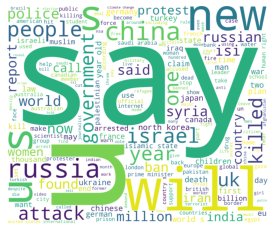

In [12]:
plt.imshow(wordcloud)
plt.axis('off')

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
sid_obj = SentimentIntensityAnalyzer() 
# sentence = "This is awesome"
# sentiment_dict = sid_obj.polarity_scores(sentence) 
# print("Overall sentiment dictionary is : ", sentiment_dict) 
# print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
# print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
# print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 

In [28]:
sentiment = df['cleaned_title'].apply(lambda x: sid_obj.polarity_scores(x))

In [29]:
# Now to add output as column
df = pd.concat([df, sentiment.apply(pd.Series)], 1) # 1 is for axis(to add in columns)

In [31]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit,cleaned_title,score,neg,neu,pos,compound
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews,bbc cover anonym scientolog protests,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",0.322,0.678,0.000,-0.2263
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews,morbid obes man confus whi fire offici are ups...,"{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...",0.185,0.815,0.000,-0.6124
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews,sigh time updat pic,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.000,0.732,0.268,0.0258
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews,isra minist vow palestinian holocaust,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews,the gaza bombshell vaniti fair report bush tri...,"{'neg': 0.241, 'neu': 0.617, 'pos': 0.142, 'co...",0.241,0.617,0.142,-0.3818


In [35]:
# The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
# Here we are considering if for a post compound <= -0.05 then it is negative sentiment, if it is >= 0.05 then positive, else neutral
def add_sentiment(x):
    if x >= 0.05:
       return "positive"
    elif x <= -0.05:
       return "negative"
    else:
       return "neutral"

df["sentiment"] = df["compound"].apply(add_sentiment)

In [37]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit,cleaned_title,score,neg,neu,pos,compound,sentiment
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews,bbc cover anonym scientolog protests,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",0.322,0.678,0.000,-0.2263,negative
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews,morbid obes man confus whi fire offici are ups...,"{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...",0.185,0.815,0.000,-0.6124,negative
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews,sigh time updat pic,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.000,0.732,0.268,0.0258,neutral
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews,isra minist vow palestinian holocaust,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews,the gaza bombshell vaniti fair report bush tri...,"{'neg': 0.241, 'neu': 0.617, 'pos': 0.142, 'co...",0.241,0.617,0.142,-0.3818,negative


<AxesSubplot:xlabel='sentiment'>

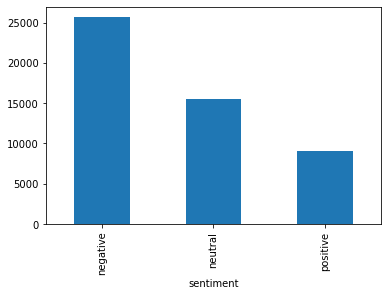

In [38]:
df.groupby(["sentiment"]).size().plot(kind = "bar")